# PATTERN MINING

In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.frequent_patterns import fpgrowth

In [386]:
train = pd.read_csv('pp_train.csv')
test = pd.read_csv('pp_test.csv')
df = pd.concat([train, test], axis=0, ignore_index=True)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21556 entries, 0 to 21555
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                21556 non-null  object 
 1   rating                       21556 non-null  int64  
 2   startYear                    21556 non-null  int64  
 3   endYear                      20516 non-null  float64
 4   runtimeMinutes               15393 non-null  float64
 5   awardWins                    21556 non-null  float64
 6   numVotes                     21556 non-null  int64  
 7   totalImages                  21556 non-null  int64  
 8   totalVideos                  21556 non-null  int64  
 9   totalCredits                 21556 non-null  int64  
 10  criticReviewsTotal           21556 non-null  int64  
 11  titleType                    21556 non-null  object 
 12  awardNominationsExcludeWins  21556 non-null  int64  
 13  canHaveEpisodes 

In [388]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'countryOfOrigin', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryO

## Gestione variabili 

### Osservare la distribuzione delle numeriche per binning

In [389]:
df['totalNominations'].value_counts().sort_index()[25:50]

totalNominations
25.0    7
26.0    7
27.0    7
28.0    8
29.0    5
30.0    7
31.0    4
32.0    2
33.0    1
34.0    3
35.0    4
36.0    1
37.0    4
38.0    2
39.0    4
40.0    3
41.0    2
42.0    1
43.0    2
44.0    1
45.0    4
46.0    3
47.0    1
49.0    2
50.0    1
Name: count, dtype: int64

count    21556.000000
mean         0.975135
std          6.750601
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        409.000000
Name: totalNominations, dtype: float64


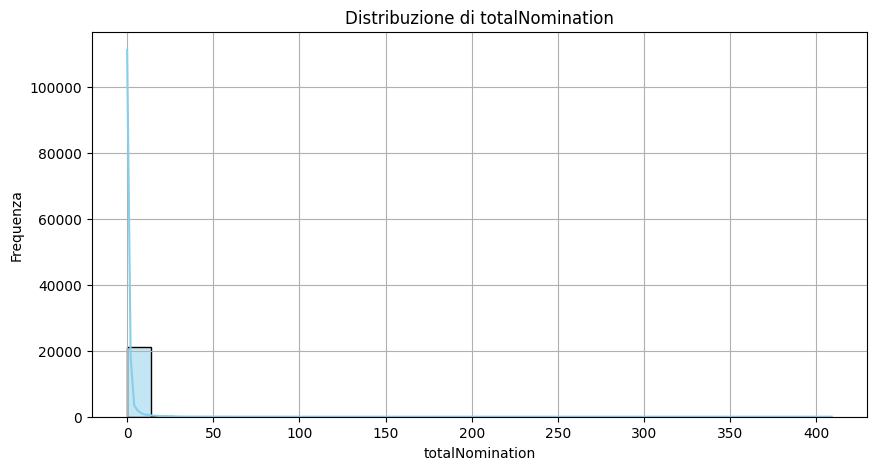

In [390]:
# Statistiche descrittive
print(df['totalNominations'].describe())

# Istogramma + KDE (curva di densità)
plt.figure(figsize=(10, 5))
sns.histplot(df['totalNominations'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribuzione di totalNomination')
plt.xlabel('totalNomination')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

In [391]:
df['startYear'].value_counts().sort_index()

startYear
1878      1
1891      1
1893      1
1894      7
1895      7
       ... 
2020    522
2021    520
2022    476
2023    418
2024    167
Name: count, Length: 133, dtype: int64

In [392]:
df['fill_runtimeMinutes_Bruno'].value_counts().sort_index()

fill_runtimeMinutes_Bruno
0.0         1
1.0       107
2.0        65
3.0       117
4.0       113
         ... 
570.0       1
600.0       1
1050.0      1
1290.0      1
3000.0      1
Name: count, Length: 253, dtype: int64

In [393]:
df['totalMedia'].value_counts().sort_index()

totalMedia
0       4296
1       6296
2       2351
3       1211
4        946
        ... 
2652       1
2767       1
3108       1
3350       1
3516       1
Name: count, Length: 297, dtype: int64

In [394]:
df['numVotes'].value_counts().sort_index()

numVotes
5          262
6          472
7          638
8          684
9          649
          ... 
737343       1
803146       1
825934       1
966565       1
1071372      1
Name: count, Length: 2299, dtype: int64

In [395]:
df['totalCredits'].value_counts().sort_index()

totalCredits
0        109
1        282
2        222
3        236
4        312
        ... 
3925       1
4404       1
4443       1
4973       1
15742      1
Name: count, Length: 596, dtype: int64

In [396]:
df['criticReviewsTotal'].value_counts().sort_index()

criticReviewsTotal
0      14982
1       2511
2       1006
3        586
4        406
       ...  
418        1
439        1
491        1
533        1
567        1
Name: count, Length: 178, dtype: int64

In [397]:
df['numRegions'].value_counts().sort_index()

numRegions
1     12505
2      2484
3      1174
4       946
5       656
      ...  
58        2
60        1
62        1
63        1
69        1
Name: count, Length: 62, dtype: int64

In [398]:
df['userReviewsTotal'].value_counts().sort_index()

userReviewsTotal
0       12080
1        3290
2        1490
3         863
4         551
        ...  
1604        1
1663        1
1821        1
2423        1
5727        1
Name: count, Length: 284, dtype: int64

In [399]:
df['rating'].value_counts().sort_index()

rating
1        6
2       81
3      205
4      614
5     1512
6     3658
7     5985
8     6322
9     2713
10     460
Name: count, dtype: int64

### Trasformazione binaria con valori semanticamente significativi

In [400]:
df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
canhaveeps_dict = {0: "cant_have_episodes", 1: "can_have_episodes"}
df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)
df["canHaveEpisodes"]

0        cant_have_episodes
1        cant_have_episodes
2         can_have_episodes
3         can_have_episodes
4        cant_have_episodes
                ...        
21551    cant_have_episodes
21552    cant_have_episodes
21553    cant_have_episodes
21554     can_have_episodes
21555     can_have_episodes
Name: canHaveEpisodes, Length: 21556, dtype: object

In [401]:
df["isAdult"] = df["isAdult"].astype(int)
canhaveeps_dict = {0: "is_not_adult", 1: "is_adult"}
df["isAdult"] = df["isAdult"].map(canhaveeps_dict)
df["isAdult"]

0        is_not_adult
1        is_not_adult
2        is_not_adult
3        is_not_adult
4        is_not_adult
             ...     
21551    is_not_adult
21552    is_not_adult
21553    is_not_adult
21554    is_not_adult
21555    is_not_adult
Name: isAdult, Length: 21556, dtype: object

### Gestione outliers --> altimenti rischiamo di avere dei bin sfasati (LASCIATO IN SOSPESO)

In [402]:
def detect_outliers(data, columns_to_check, threshold_std_dev=2.0, threshold_iqr=1.5):
    """
    Identifies potential outliers in the specified columns of a DataFrame using two methods:
    1. Standard deviation.
    2. Interquartile range (IQR).

    Args:
        data (pd.DataFrame): The input DataFrame.
        columns_to_check (list): List of column names to check for outliers.
        threshold_std_dev (float): Multiplier for standard deviation threshold.
        threshold_iqr (float): Multiplier for IQR threshold.

    Returns:
        dict: A dictionary with the following keys:
            - "columns_with_outliers_std_dev": Columns with outliers detected by standard deviation.
            - "columns_with_outliers_iqr": Columns with outliers detected by IQR.
            - "common_outlier_columns": Columns with outliers detected by both methods.
    """
    # Select only the specified columns
    numeric_columns = data[columns_to_check]

    # Calculate quartiles and IQR
    quartiles = numeric_columns.quantile([0.25, 0.75])
    lower_quartile = quartiles.loc[0.25]
    upper_quartile = quartiles.loc[0.75]
    interquartile_range = upper_quartile - lower_quartile

    # Identify outliers using the standard deviation method
    outliers_std_dev = (numeric_columns - numeric_columns.mean()).abs() > threshold_std_dev * numeric_columns.std()

    # Identify outliers using the IQR method
    outliers_iqr = (numeric_columns < lower_quartile - threshold_iqr * interquartile_range) | \
                   (numeric_columns > upper_quartile + threshold_iqr * interquartile_range)

    # Determine columns with outliers for each method
    columns_with_outliers_std_dev = numeric_columns.columns[outliers_std_dev.any()]
    columns_with_outliers_iqr = numeric_columns.columns[outliers_iqr.any()]

    # Find common columns with outliers detected by both methods
    common_outlier_columns = columns_with_outliers_std_dev.intersection(columns_with_outliers_iqr)

    return {
        "columns_with_outliers_std_dev": columns_with_outliers_std_dev.tolist(),
        "columns_with_outliers_iqr": columns_with_outliers_iqr.tolist(),
        "common_outlier_columns": common_outlier_columns.tolist()
    }

# Example usage:
columns_to_check = [
    "fill_runtimeMinutes_Bruno",  
    "numVotes", 
    "numRegions", 
    "totalMedia", 
    "totalCredits", 
    "criticReviewsTotal",
    "userReviewsTotal",  
    "totalNominations", 
]

outliers_info = detect_outliers(df, columns_to_check)
print("\nColumns with potential outliers detected by IQR:")
print(outliers_info["columns_with_outliers_iqr"])


Columns with potential outliers detected by IQR:
['fill_runtimeMinutes_Bruno', 'numVotes', 'numRegions', 'totalMedia', 'totalCredits', 'criticReviewsTotal', 'userReviewsTotal', 'totalNominations']


### Realizzazione bin (qcut o cut?)

In [403]:
# bins_nomination = [0, 1, 10, float('inf')]
# labels_awards = [0, 1, 2]  # Mantengo valori numerici per compatibilità con algoritmi
# df['awardWins_bin'] = pd.cut(df['awardWins'], bins=df, labels=labels_awards, right=False)
# ## pp_test_class['awardWins_bin'] = pd.cut(pp_test_class['awardWins'], bins=bins_awards, labels=labels_awards, right=False)

In [404]:
import pandas as pd

# Crea una copia del DataFrame per evitare modifiche indesiderate
df_copy = df.copy()

# Inizializza la colonna 'nom_bin' con il valore 'zero'
df_copy['nom_bin'] = 'zero'

# Crea una maschera per i valori maggiori di zero
mask_nonzero = df_copy['totalNominations'] > 0

# Applica pd.qcut ai valori positivi
df_copy.loc[mask_nonzero, 'nom_bin'] = pd.qcut(
    df_copy.loc[mask_nonzero, 'totalNominations'],
    q=4,
    labels=['basso', "medio" ,'alto'],
    duplicates='drop'  # Gestisce eventuali bordi duplicati
)

In [406]:
# Riepilogo del dataset con la colonna 'nom_bin'
print(df_copy.groupby('nom_bin')['totalNominations'].describe())

           count       mean        std  min  25%   50%   75%    max
nom_bin                                                            
alto       865.0  18.027746  28.601617  6.0  7.0  10.0  17.0  409.0
basso     1983.0   1.323752   0.468025  1.0  1.0   1.0   2.0    2.0
medio      747.0   3.749665   0.766409  3.0  3.0   4.0   4.0    5.0
zero     17961.0   0.000000   0.000000  0.0  0.0   0.0   0.0    0.0


In [407]:
# df['nom_bin'] = 'zero_nominations'
# mask_nonzero = df['totalNominations'] > 0
# df.loc[mask_nonzero, 'nom_bin'] = pd.qcut(df.loc[mask_nonzero, 'totalNominations'], q=3, labels=['low', 'medium', 'high'], duplicates='drop')

In [408]:
# df["totalNominations_bin"] = pd.qcut(df['totalNominations'], q=4, )

In [409]:
# df["AgeBin"] = pd.qcut(df["Age"], 4) #we define the number of bins and the result is just the bin where that specific value fits in
# df["FareBin"] = pd.qcut(df["Fare"], 4)

# df["AgeBin"] = df["AgeBin"].astype(str) + "_Age" #this is the way to reference the value of the feature
# df["FareBin"] = df["FareBin"].astype(str) + "_Fare"

# df["Embarked"] = df["Embarked"] + "_Port"